# Reconstruction and prior comparison

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sys

from scipy import signal
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [3]:
sys.path.insert(1,'/home/disk/kalman2/mkb22/LMR_lite/')
import LMR_utils 

sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/')
import commonera_utils as ce_utils 

In [4]:
import importlib
# #importlib.reload(LMRlite)
# #importlib.reload(LMR_config)
# importlib.reload(LMRlite)
importlib.reload(ce_utils)

<module 'commonera_utils' from '/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/commonera_utils.py'>

In [5]:
def load_recon_allit(output_dir,filename,niter,prox_loc=True):

    for it in range(niter):
        output_file = filename[:-5]+str(it)+'.pkl'

        if prox_loc is True: 
            [sic_lalo, tas_lalo, sic_ens_var, 
             nobs, sia_ens, sie_ens, recon_years, 
             Ye_assim, Ye_assim_coords, Xb_inflate, proxy_assim_loc] = load_recon(output_dir+output_file)          
        else: 
            [sic_lalo, tas_lalo, sic_ens_var, 
             nobs, sia_ens, sie_ens, recon_years, 
             Ye_assim, Ye_assim_coords, Xb_inflate] = load_recon(output_dir+output_file, prox_loc=False)

        if it is 0: 
            sic_lalo_allit = np.zeros((sic_lalo.shape[0],sic_lalo.shape[1],sic_lalo.shape[2],niter))
            tas_lalo_allit = np.zeros((tas_lalo.shape[0],tas_lalo.shape[1],tas_lalo.shape[2],niter))
            sic_ens_var_allit = np.zeros(niter)
            nobs_allit = np.zeros((nobs.shape[0],niter))
            sia_ens_allit = np.zeros((sia_ens.shape[0],sia_ens.shape[1],niter))
            sie_ens_allit = np.zeros((sie_ens.shape[0],sie_ens.shape[1],niter))
            Ye_assim_allit = np.zeros((Ye_assim.shape[0],Ye_assim.shape[1],niter))
            Ye_assim_coords_allit = np.zeros((Ye_assim_coords.shape[0],Ye_assim_coords.shape[1],niter))
            Xb_inflate_allit = np.zeros((Xb_inflate.shape[0],Xb_inflate.shape[1],niter))
            if prox_loc is True: 
                proxy_assim_loc_allit = {}

        sic_lalo_allit[:,:,:,it] = sic_lalo
        tas_lalo_allit[:,:,:,it] = tas_lalo
        sic_ens_var_allit[it] = niter
        nobs_allit[:,it] = nobs
        sia_ens_allit[:,:,it] = sia_ens
        sie_ens_allit[:,:,it] = sie_ens
        Ye_assim_allit[:,:,it] = Ye_assim
        Ye_assim_coords_allit[:,:,it] = Ye_assim_coords
        Xb_inflate_allit[:,:,it] = Xb_inflate
        if prox_loc is True: 
            proxy_assim_loc_allit['iter '+str(it)] = proxy_assim_loc
        
    if prox_loc is True:        
        return (sic_lalo_allit, tas_lalo_allit, sic_ens_var_allit, nobs_allit, 
                sia_ens_allit, sie_ens_allit, Ye_assim_allit, Ye_assim_coords_allit, 
                Xb_inflate_allit,recon_years, proxy_assim_loc_allit)
    else: 
        return (sic_lalo_allit, tas_lalo_allit, sic_ens_var_allit, nobs_allit, 
                sia_ens_allit, sie_ens_allit, Ye_assim_allit, Ye_assim_coords_allit, 
                Xb_inflate_allit,recon_years)

In [6]:
def load_recon(LOC, prox_loc=True):
    recon = pickle.load(open(LOC,'rb'))
    
    sic_lalo = recon['sic_lalo']
    tas_lalo = recon['tas_lalo']
    sic_ens_var = recon['sic_ens_var']
    nobs = recon['nobs']
    sia_ens = recon['sia_ens']
    sie_ens = recon['sie_ens']
    recon_years = recon['recon_years']
    Ye_assim = recon['Ye_assim']
    Ye_assim_coords = recon['Ye_assim_coords']
    Xb_inflate = recon['Xb_inflate'] 
    
    if prox_loc is True: 
        proxy_assim_loc = recon['proxy_assim_loc']
    
        return (sic_lalo, tas_lalo, sic_ens_var, nobs, sia_ens, sie_ens, recon_years, 
                Ye_assim, Ye_assim_coords, Xb_inflate, proxy_assim_loc)
    else: 
        return (sic_lalo, tas_lalo, sic_ens_var, nobs, sia_ens, sie_ens, recon_years, 
                Ye_assim, Ye_assim_coords, Xb_inflate)

In [7]:
def load_ccsm4_lm_regridded():
    ccsm4_dir = '/home/disk/chaos/mkb22/Documents/SeaIceData/CCSM4/CCSM4_last_millennium/'
    ccsm4_file = 'ccsm4_sic_sit_tas_20CRv2_850_1850_full.npz'

    ccsm4_lm = np.load(ccsm4_dir+ccsm4_file)

    ccsm4_truth_sic = ccsm4_lm['sic_ccsm4']
    ccsm4_truth_sit = ccsm4_lm['sit_ccsm4']
    ccsm4_truth_tas = ccsm4_lm['tas_ccsm4']
    ccsm4_truth_lat = ccsm4_lm['lat_ccsm4']
    ccsm4_truth_lon = ccsm4_lm['lon_ccsm4']
    
    return ccsm4_truth_tas, ccsm4_truth_sic, ccsm4_truth_sit, ccsm4_truth_lat, ccsm4_truth_lon

In [8]:
def load_mpi_lm_regridded():
    mpi_dir = '/home/disk/chaos/mkb22/Documents/SeaIceData/MPI/'
    mpi_file = 'mpi_sic_sit_tas_20CRv2_850_1850_full.npz'

    mpi_lm = np.load(mpi_dir+mpi_file)

    mpi_truth_sic = mpi_lm['sic_mpi']
    mpi_truth_sit = mpi_lm['sit_mpi']
    mpi_truth_tas = mpi_lm['tas_mpi']
    mpi_truth_lat = mpi_lm['lat_mpi']
    mpi_truth_lon = mpi_lm['lon_mpi']
    
    return mpi_truth_tas, mpi_truth_sic, mpi_truth_sit, mpi_truth_lat, mpi_truth_lon

In [9]:
anom_start = 850
anom_end = 1850

### Load priors: 

In [10]:
# NH surface area in M km^2 from concentration in percentage
nharea = 2*np.pi*(6380**2)/1e6

In [11]:
[ccsm4_truth_tas, ccsm4_truth_sic, 
 ccsm4_truth_sit,
 ccsm4_truth_lat, ccsm4_truth_lon] = load_ccsm4_lm_regridded()

ccsm4_truth_time = np.arange(850,1851,1)

In [12]:
[sia_nh_ccsm4_truth, sie_nh_ccsm4_truth, 
 sia_nh_ccsm4_truth_anom, sie_nh_ccsm4_truth_anom,
 sia_sh_ccsm4_truth, sie_sh_ccsm4_truth, 
 sia_sh_ccsm4_truth_anom, 
 sie_sh_ccsm4_truth_anom] = ce_utils.calc_lm_tot_si(ccsm4_truth_sic,ccsm4_truth_lat, 
                                                    ccsm4_truth_time, anom_start, anom_end)

In [13]:
[mpi_truth_tas, mpi_truth_sic, 
 mpi_truth_sit,
 mpi_truth_lat, mpi_truth_lon] = load_mpi_lm_regridded()

mpi_time = np.arange(850,1850,1)

In [14]:
[sia_nh_mpi, sie_nh_mpi, 
 sia_nh_mpi_anom, sie_nh_mpi_anom,
 sia_sh_mpi, sie_sh_mpi, 
 sia_sh_mpi_anom, sie_sh_mpi_anom] = ce_utils.calc_lm_tot_si(mpi_truth_sic,mpi_truth_lat, 
                                                             mpi_time, anom_start, anom_end)

In [24]:
Wn2 = 1.0/10
nf2 = 7
b2,a2 = signal.butter(nf2,Wn2,btype='lowpass')
w2, h2 = signal.freqs(b2, a2)

sie_ccsm4_filt20 = signal.filtfilt(b2,a2,sie_nh_ccsm4_truth_anom)
sie_mpi_filt20 = signal.filtfilt(b2,a2,sie_nh_mpi_anom)

/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


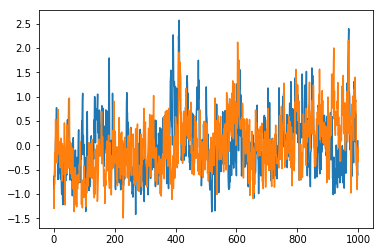

In [16]:
plt.plot(sie_nh_mpi_anom)
plt.plot(sie_nh_ccsm4_truth_anom)

### Load reconstructions: 

In [17]:
output_dir_ccsm4 = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/ccsm4/'
output_file_ccsm4 = 'sic_ccsm4_anrecon_0_2000_pages2kv2_inf2_6_loc15000_iter0.pkl'

niter = 10

[sic_lalo_allit_ccsm4, tas_lalo_allit_ccsm4, sic_ens_var_allit_ccsm4, 
 nobs_allit_ccsm4, sia_ens_allit_ccsm4, sie_ens_allit_ccsm4, Ye_assim_allit_ccsm4, 
 Ye_assim_coords_allit_ccsm4, Xb_inflate_allit_ccsm4, recon_years, 
 proxy_assim_loc_allit_ccsm4] = load_recon_allit(output_dir_ccsm4,output_file_ccsm4,niter)

In [18]:
# Find indices to take anomalies over: 
anom_ind = np.where((np.array(recon_years)<anom_end)&(np.array(recon_years)>=anom_start))

sie_ens_allit_2d_ccsm4 = np.reshape(sie_ens_allit_ccsm4,(sie_ens_allit_ccsm4.shape[0],
                                    sie_ens_allit_ccsm4.shape[1]*sie_ens_allit_ccsm4.shape[2]))
sie_ens_anom_allit_ccsm4 = sie_ens_allit_2d_ccsm4 - np.nanmean(np.squeeze(sie_ens_allit_2d_ccsm4[anom_ind,:]),axis=0)
sie_ensmn_anom_allit_ccsm4 = np.nanmean(sie_ens_anom_allit_ccsm4,axis=1)

sie_97_5_allit_ccsm4 = np.percentile(sie_ens_anom_allit_ccsm4,97.5,axis=1)
sie_2_5_allit_ccsm4 = np.percentile(sie_ens_anom_allit_ccsm4,2.5,axis=1)

In [19]:
output_dir_mpi = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/mpi/'
output_file_mpi = 'sic_mpi_anrecon_0_2000_pages2kv2_inf1_8_loc15000_iter0.pkl'

[sic_lalo_allit_mpi, tas_lalo_allit_mpi, sic_ens_var_allit_mpi, 
 nobs_allit_mpi, sia_ens_allit_mpi, sie_ens_allit_mpi, Ye_assim_allit_mpi, 
 Ye_assim_coords_allit_mpi, Xb_inflate_allit_mpi, recon_years, 
 proxy_assim_loc_allit_mpi] = load_recon_allit(output_dir_mpi,output_file_mpi,niter)

In [20]:
sie_ens_allit_2d_mpi = np.reshape(sie_ens_allit_mpi,(sie_ens_allit_mpi.shape[0],
                                    sie_ens_allit_mpi.shape[1]*sie_ens_allit_mpi.shape[2]))
sie_ens_anom_allit_mpi = sie_ens_allit_2d_mpi - np.nanmean(np.squeeze(sie_ens_allit_2d_mpi[anom_ind,:]),axis=0)
sie_ensmn_anom_allit_mpi = np.nanmean(sie_ens_anom_allit_mpi,axis=1)

sie_97_5_allit_mpi = np.percentile(sie_ens_allit_2d_mpi,97.5,axis=1)
sie_2_5_allit_mpi = np.percentile(sie_ens_allit_2d_mpi,2.5,axis=1)

In [21]:
sie_ccsm4_recon_filt20 = signal.filtfilt(b2,a2,sie_ensmn_anom_allit_ccsm4)
sie_mpi_recon_filt20 = signal.filtfilt(b2,a2,sie_ensmn_anom_allit_mpi)

/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


## Correlation and CE: 

In [42]:
[ce_sie_ccsm4_mpi,corr_sie_ccsm4_mpi,
 var_sie_sat_ccsm4_mpi,
 var_sie_ccsm4_mpi] = ce_utils.find_ce_corr(sie_nh_ccsm4_truth_anom, 
                                            sie_nh_mpi_anom,
                                            ccsm4_truth_time,
                                            mpi_time,anom_start,anom_end)

[ce_sie_recon_ccsm4_ccsm4,corr_sie_recon_ccsm4_ccsm4,
 var_sie_sat_rccsm4_mpi,
 var_sie_recon_ccsm4_ccsm4] = ce_utils.find_ce_corr(sie_ensmn_anom_allit_ccsm4, 
                                                   sie_nh_ccsm4_truth_anom,
                                                   np.array(recon_years),
                                                   ccsm4_truth_time,anom_start,anom_end)

[ce_sie_recon_mpi_mpi,corr_sie_recon_mpi_mpi,
 var_sie_sat_rmpi_mpi,
 var_sie_recon_mpi_mpi] = ce_utils.find_ce_corr(sie_ensmn_anom_allit_mpi, 
                                                  sie_nh_mpi_anom,
                                                  np.array(recon_years),
                                                  mpi_time,anom_start,anom_end)

[ce_sie_recon_ccsm4_mpi,corr_sie_recon_ccsm4_mpi,
 var_sie_sat_rccsm4_mpi,
 var_sie_recon_ccsm4_mpi] = ce_utils.find_ce_corr(sie_ensmn_anom_allit_ccsm4, 
                                                  sie_nh_mpi_anom,
                                                  np.array(recon_years),
                                                  mpi_time,anom_start,anom_end)

[ce_sie_recon_mpi_ccsm4,corr_sie_recon_mpi_ccsm4,
 var_sie_sat_ccsm4_mpi,
 var_sie_recon_mpi_ccsm4] = ce_utils.find_ce_corr(sie_ensmn_anom_allit_mpi, 
                                                  sie_nh_ccsm4_truth_anom,
                                                  np.array(recon_years),
                                                  ccsm4_truth_time,anom_start,anom_end)

[ce_sie_recon_mpi_recon_ccsm4,corr_sie_recon_mpi_recon_ccsm4,
 var_sie_sat_ccsm4_mpi,
 var_sie_recon_mpi_recon_ccsm4] = ce_utils.find_ce_corr(sie_ensmn_anom_allit_mpi, 
                                                        sie_ensmn_anom_allit_ccsm4,
                                                        np.array(recon_years),
                                                        np.array(recon_years),anom_start,anom_end)

In [43]:
[ce_filt_sie_ccsm4_mpi,corr_filt_sie_ccsm4_mpi,
 var_filt_sie_sat_ccsm4_mpi,
 var_filt_sie_ccsm4_mpi] = ce_utils.find_ce_corr(sie_ccsm4_filt20, 
                                                  sie_mpi_filt20,
                                                  ccsm4_truth_time,
                                                  mpi_time,anom_start,anom_end)

[ce_filt_sie_recon_ccsm4_ccsm4,corr_filt_sie_recon_ccsm4_ccsm4,
 var_filt_sie_sat_rccsm4_mpi,
 var_filt_sie_recon_ccsm4_ccsm4] = ce_utils.find_ce_corr(sie_ccsm4_recon_filt20, 
                                                   sie_ccsm4_filt20,
                                                   np.array(recon_years),
                                                   ccsm4_truth_time,anom_start,anom_end)

[ce_filt_sie_recon_mpi_mpi,corr_filt_sie_recon_mpi_mpi,
 var_filt_sie_sat_rmpi_mpi,
 var_filt_sie_recon_mpi_mpi] = ce_utils.find_ce_corr(sie_mpi_recon_filt20, 
                                                  sie_mpi_filt20,
                                                  np.array(recon_years),
                                                  mpi_time,anom_start,anom_end)

[ce_filt_sie_recon_ccsm4_mpi,corr_filt_sie_recon_ccsm4_mpi,
 var_filt_sie_sat_rccsm4_mpi,
 var_filt_sie_recon_ccsm4_mpi] = ce_utils.find_ce_corr(sie_ccsm4_recon_filt20, 
                                                  sie_mpi_filt20,
                                                  np.array(recon_years),
                                                  mpi_time,anom_start,anom_end)

[ce_filt_sie_recon_mpi_ccsm4,corr_filt_sie_recon_mpi_ccsm4,
 var_filt_sie_sat_ccsm4_mpi,
 var_filt_sie_recon_mpi_ccsm4] = ce_utils.find_ce_corr(sie_mpi_recon_filt20, 
                                                  sie_ccsm4_filt20,
                                                  np.array(recon_years),
                                                  ccsm4_truth_time,anom_start,anom_end)

[ce_filt_sie_recon_mpi_recon_ccsm4,corr_filt_sie_recon_mpi_recon_ccsm4,
 var_filt_sie_sat_ccsm4_mpi,
 var_filt_sie_recon_mpi_recon_ccsm4] = ce_utils.find_ce_corr(sie_mpi_recon_filt20, 
                                                        sie_ccsm4_recon_filt20,
                                                        np.array(recon_years),
                                                        np.array(recon_years),anom_start,anom_end)

In [44]:
print('Filtered data performance: \n')

print("R^2: CCSM4 LM v MPI LM = "+ str(np.round(corr_filt_sie_ccsm4_mpi**2,2)))
print("CE:  sat v CCSM4 = "+ str(np.round(ce_filt_sie_ccsm4_mpi,2))+'\n')

print("R^2:   Recon CCSM4 v CCSM4 LM = "+ str(np.round(corr_filt_sie_recon_ccsm4_ccsm4**2,2)))
print("CE:    Recon CCSM4 v CCSM4 LM = "+ str(np.round(ce_filt_sie_recon_ccsm4_ccsm4,2))+'\n')

print("R^2:   Recon MPI v CCSM4 LM = "+ str(np.round(corr_filt_sie_recon_mpi_ccsm4**2,2)))
print("CE:    Recon MPI v CCSM4 LM = "+ str(np.round(ce_filt_sie_recon_mpi_ccsm4,2))+'\n')

print("R^2:   Recon MPI v MPI LM = "+ str(np.round(corr_filt_sie_recon_mpi_mpi**2,2)))
print("CE:    Recon MPI v MPI LM = "+ str(np.round(ce_filt_sie_recon_mpi_mpi,2))+'\n')

print("R^2:   Recon CCSM4 v MPI LM = "+ str(np.round(corr_filt_sie_recon_ccsm4_mpi**2,2)))
print("CE:    Recon CCSM4 v MPI LM = "+ str(np.round(ce_filt_sie_recon_ccsm4_mpi,2))+'\n')

print("R^2:   Recon MPI v Recon CCSM4 = "+ str(np.round(corr_filt_sie_recon_mpi_recon_ccsm4**2,2)))
print("CE:    Recon MPI v Recon CCSM4 = "+ str(np.round(ce_filt_sie_recon_mpi_recon_ccsm4,2))+'\n')

Filtered data performance: 

R^2: CCSM4 LM v MPI LM = 0.07
CE:  sat v CCSM4 = -0.41

R^2:   Recon CCSM4 v CCSM4 LM = 0.28
CE:    Recon CCSM4 v CCSM4 LM = 0.28

R^2:   Recon MPI v CCSM4 LM = 0.35
CE:    Recon MPI v CCSM4 LM = 0.34

R^2:   Recon MPI v MPI LM = 0.13
CE:    Recon MPI v MPI LM = 0.11

R^2:   Recon CCSM4 v MPI LM = 0.12
CE:    Recon CCSM4 v MPI LM = 0.1

R^2:   Recon MPI v Recon CCSM4 = 0.92
CE:    Recon MPI v Recon CCSM4 = 0.91



In [45]:
print('Unfiltered data performance: \n')

print("R^2: CCSM4 LM v MPI LM = "+ str(np.round(corr_sie_ccsm4_mpi**2,2)))
print("CE:  sat v CCSM4 = "+ str(np.round(ce_sie_ccsm4_mpi,2))+'\n')

print("R^2:   Recon CCSM4 v CCSM4 LM = "+ str(np.round(corr_sie_recon_ccsm4_ccsm4**2,2)))
print("CE:    Recon CCSM4 v CCSM4 LM = "+ str(np.round(ce_sie_recon_ccsm4_ccsm4,2))+'\n')

print("R^2:   Recon MPI v CCSM4 LM = "+ str(np.round(corr_sie_recon_mpi_ccsm4**2,2)))
print("CE:    Recon MPI v CCSM4 LM = "+ str(np.round(ce_sie_recon_mpi_ccsm4,2))+'\n')

print("R^2:   Recon MPI v MPI LM = "+ str(np.round(corr_sie_recon_mpi_mpi**2,2)))
print("CE:    Recon MPI v MPI LM = "+ str(np.round(ce_sie_recon_mpi_mpi,2))+'\n')

print("R^2:   Recon CCSM4 v MPI LM = "+ str(np.round(corr_sie_recon_ccsm4_mpi**2,2)))
print("CE:    Recon CCSM4 v MPI LM = "+ str(np.round(ce_sie_recon_ccsm4_mpi,2))+'\n')

print("R^2:   Recon MPI v Recon CCSM4 = "+ str(np.round(corr_sie_recon_mpi_recon_ccsm4**2,2)))
print("CE:    Recon MPI v Recon CCSM4 = "+ str(np.round(ce_sie_recon_mpi_recon_ccsm4,2))+'\n')

Unfiltered data performance: 

R^2: CCSM4 LM v MPI LM = 0.04
CE:  sat v CCSM4 = -0.54

R^2:   Recon CCSM4 v CCSM4 LM = 0.11
CE:    Recon CCSM4 v CCSM4 LM = 0.1

R^2:   Recon MPI v CCSM4 LM = 0.16
CE:    Recon MPI v CCSM4 LM = 0.16

R^2:   Recon MPI v MPI LM = 0.07
CE:    Recon MPI v MPI LM = 0.04

R^2:   Recon CCSM4 v MPI LM = 0.05
CE:    Recon CCSM4 v MPI LM = 0.02

R^2:   Recon MPI v Recon CCSM4 = 0.86
CE:    Recon MPI v Recon CCSM4 = 0.86



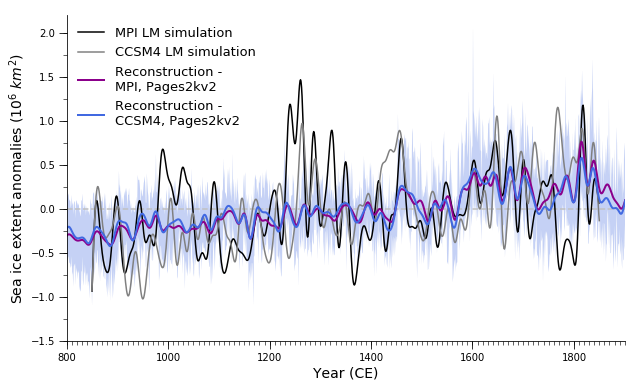

In [88]:
#plt.figure(figsize=(10,6))
fig,ax = plt.subplots(1,figsize=(10,6))
plt.axhline(0,linestyle='--',color='silver')

# plt.fill_between(recon_years,sie_2_5_allit_mpi,sie_97_5_allit_mpi,alpha=0.15, color='purple')
# plt.fill_between(bren2020_time,sie_CCSM4_HadCRUT4_2_5_anom,sie_CCSM4_HadCRUT4_97_5_anom,
#                  color='k',alpha=0.15,linewidth=0.01)
# plt.fill_between(bren2020_time,sie_MPI_HadCRUT4_2_5_anom,sie_MPI_HadCRUT4_97_5_anom,
#                  color='k',alpha=0.15,linewidth=0.01)
plt.fill_between(recon_years,sie_2_5_allit_mpi,sie_97_5_allit_mpi,
                 alpha=0.15, color='darkmagenta',linewidth=0.0)
plt.fill_between(recon_years,sie_2_5_allit_ccsm4,sie_97_5_allit_ccsm4,
                 alpha=0.3, color='royalblue',linewidth=0.01)

plt.plot(mpi_time,sie_mpi_filt20,label= 'MPI LM simulation',color='k',linewidth=1.5)
plt.plot(ccsm4_truth_time,sie_ccsm4_filt20,label= 'CCSM4 LM simulation',color='gray',linewidth=1.5)

plt.plot(recon_years,sie_mpi_recon_filt20,color='darkmagenta',#'#8756e4',
         label='Reconstruction - \nMPI, Pages2kv2',linewidth=2)
plt.plot(recon_years,sie_ccsm4_recon_filt20,color='royalblue',#'#8756e4',
         label='Reconstruction - \nCCSM4, Pages2kv2',linewidth=2)

# plt.plot(bren2020_time,sie_bren2020['sie_MPI_HadCRUT4_anom'],
#          label='MPI prior, HadCRUT4 obs (Brennan et al. 2020)', color='grey',linewidth=1.5)

plt.ylabel('Sea ice extent anomalies (10$^{6}$ $km^2$)',fontsize=14)
plt.xlabel('Year (CE)',fontsize=14)
#plt.title('Total Arctic Sea Ice Extent', fontsize=14)

#plt.legend(fontsize=13,bbox_to_anchor=(0.79, 0.35),frameon=False)
plt.legend(fontsize=13,loc='upper left',frameon=False)

#plt.ylim(7,13.1,1)
# ce_corr_plt_ccsm4 = (('(Brennan et al. 2020, DA proxy recon): R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_ccsm4_ccsm4**2))+
#                ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4_ccsm4))
# ce_corr_plt_sat = (('(Satellite, DA proxy recon):                   R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_ccsm4_sat**2))+
#                ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4_sat))

# plt.gcf().text(0.14, 0.14, ce_corr_plt_ccsm4 , fontsize=12,color='k')
# plt.gcf().text(0.14, 0.185, ce_corr_plt_sat , fontsize=12,color='k')

plt.xlim(800,1900)
plt.ylim(-1.5,2.2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.tick_params(which='major', length=8)
ax.tick_params(which='minor', length=4)

# plt.axvline(1907,linestyle='--',color='silver')
# plt.axvline(1938,linestyle='--',color='silver')
# plt.axvline(1964,linestyle='--',color='silver')
# plt.axvline(1950,linestyle='--',color='silver')

#print(ce_sie,corr_sie,var_sie_sat,var_sie_recon)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'tot_sie_ccsm4_mpi_v_sat_walshv2_brennan_ccsm4_10it_1850_2017.png'
#plt.savefig(savedir+savename)